<a href="https://colab.research.google.com/github/SaqlainHussainShah/Cross-site-scripting-attacks/blob/master/XSS_V2_NN_128_Flatten_Dense_3_roc_auc_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import time
import pandas as pd
# from xml.dom import minidom

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 

import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
import cv2

In [3]:
df = pd.read_csv('./XSS.csv', encoding='utf-8-sig')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16317 entries, 0 to 16316
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16317 non-null  int64 
 1   Sentence    16317 non-null  object
 2   Label       16317 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 382.6+ KB


In [5]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,['canfranc' 8 'norm' 'norm'],0
1,1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [6]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,['canfranc' 8 'norm' 'norm'],0
1,1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [7]:
df=df[df.columns[-2:]]  # Only get sentence and labels

In [8]:
df.head()

,Sentence,Label
0,['canfranc' 8 'norm' 'norm'],0
1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [9]:
sentences=df['Sentence'].values
sentences[1]

'<abbr oncut="alert(1)" contenteditable>test</abbr>'

In [10]:
print(len(sentences))

16317


In [11]:
df_xss = df[df['Label'] == 1]

In [12]:
df_xss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 1 to 16316
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  8004 non-null   object
 1   Label     8004 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [13]:
df_benign = df[df['Label'] == 0]


In [14]:
df_benign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 0 to 16308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  8313 non-null   object
 1   Label     8313 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 194.8+ KB


In [15]:
# Convert to ASCII

def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        
        
        """Some characters have values very big e.d 8221 adn some are chinese letters
        I am removing letters having values greater than 8222 and for rest greater 
        than 128 and smaller than 8222 assigning them values so they can easily be normalized"""
       
        if(ord(i)<8222):      # ” has ASCII of 8221
            
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)
                
            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)
                
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)
            
            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)
                
                
            """
            If values less than 128 store them else discard them
            """
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
    
            else:
                    pass
            

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer

In [16]:
arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128

    
#     if i==1:
#         plt.plot(image)
#         plt.show()    
    arr[i]=image

In [17]:
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [18]:
data.shape

(16317, 100, 100, 1)

In [19]:
y=df['Label'].values

In [20]:


# Split into train/test data
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)



In [21]:
trainX.shape


(13053, 100, 100, 1)

In [22]:


# import libraries for Making Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization



In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(100,100,1)))

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(256, activation='relu'))

model.add(keras.layers.Dense(128, activation='relu'))

# model.add(keras.layers.Dense(20,  activation='relu'))
# model.add(keras.layers.Dense(10,  activation='tanh'))
# # model.add(layers.Flatten())
# model.add(keras.layers.Dense(1024, activation='relu'))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))



In [24]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [25]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 99% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

In [26]:


batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )



Epoch 1/10
102/102 [==============================] - 2s 16ms/step - loss: 0.2366 - accuracy: 0.9065 - val_loss: 0.3745 - val_accuracy: 0.8156
Epoch 2/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1532 - accuracy: 0.9501 - val_loss: 0.2108 - val_accuracy: 0.9406
Epoch 3/10
102/102 [==============================] - 1s 12ms/step - loss: 0.1226 - accuracy: 0.9609 - val_loss: 0.1770 - val_accuracy: 0.9305
Epoch 4/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1158 - accuracy: 0.9649 - val_loss: 0.1529 - val_accuracy: 0.9550
Epoch 5/10
102/102 [==============================] - 1s 13ms/step - loss: 0.1130 - accuracy: 0.9632 - val_loss: 0.1338 - val_accuracy: 0.9556
Epoch 6/10
102/102 [==============================] - 1s 12ms/step - loss: 0.0982 - accuracy: 0.9678 - val_loss: 0.1494 - val_accuracy: 0.9605
Epoch 7/10
102/102 [==============================] - 1s 11ms/step - loss: 0.0867 - accuracy: 0.9724 - val_loss: 0.1193 - val_accuracy: 0.9620

In [27]:
pred=model.predict(testX)

In [28]:

for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [29]:

true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1
        
print("correct predicted :: ", true)
print("false prediction :: ", false)

correct predicted ::  2986
false prediction ::  278


In [30]:
attack=0
benign=0
for i in range(len(testY)):
    if testY[i]==1:
        attack+=1
    else:
        benign+=1

print("Attack data in test set :: ", attack)
print(" Benign data in test set :: ", benign)

Attack data in test set ::  1615
 Benign data in test set ::  1649


In [31]:

def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [32]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [33]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [34]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (true_positive, true_negative,
            false_positive, false_negative,
            accuracy,
            precision,
           recall)

In [35]:
true_positive, true_negative, false_positive, false_negative, accuracy,precision,recall=confusion_matrix(testY,pred)

In [36]:



print(" For NN with batch size {3} Dense 3 \n Accuracy : {0} \n Precision : {1} \n Recall : {2} \n".format(accuracy, precision, recall,batch_size))



 For NN with batch size 128 Dense 3 
 Accuracy : 0.914828431372549 
 Precision : 0.987600291757841 
 Recall : 0.8383900928792569 



In [37]:
print("true_positive : ", true_positive)
print("true_negative : ", true_negative)
print("false_positive : ",false_positive)
print("false_negative : ", false_negative)

true_positive :  1354
true_negative :  1632
false_positive :  17
false_negative :  261


AUC  0.9140404072643707


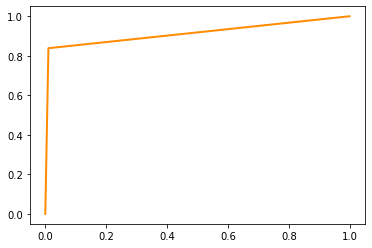

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(testY, pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
print("AUC ", roc_auc)

In [64]:

def draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative):
# total = true_positive + true_negative + false_positive + false_negative
  a = np.asarray([[true_negative,false_positive], [false_negative,true_positive]])
  ax = sns.heatmap(a, annot=True, fmt = "d", cmap="YlGnBu")
  ax.set(xlabel='Predicted Labels', ylabel='True Labels')
  plt.title("Confusion matrix")

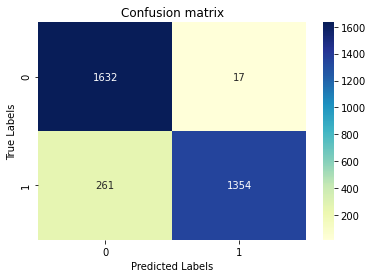

In [65]:
draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative)